In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("weather.csv")
df.columns = [c.replace(' _', '') for c in df.columns]

In [3]:
df['pressurem'].replace(-9999.0,float('nan'),inplace=True)

# Clean the data. Detect and remove outliers

In [4]:
df=df.dropna(subset=["conds","wdire"])
df=df.drop('precipm', axis=1)

In [5]:
dic=dict(df.isna().sum())
for i in dic:
    if dic[i]>0:
        df[i].fillna(df[i].mean(),inplace=True)

In [6]:
df.head()

,datetime_utc,conds,dewptm,fog,hail,heatindexm,hum,pressurem,rain,snow,tempm,thunder,tornado,vism,wdird,wdire,wgustm,windchillm,wspdm
0,19961101-11:00,Smoke,9.0,0,0,35.65171,27.0,1010.000000,0,0,30.0,0,0,5.000000,280.0,West,37.671175,5.713817,7.400000
1,19961101-12:00,Smoke,10.0,0,0,35.65171,32.0,2196.930079,0,0,28.0,0,0,2.558067,0.0,North,37.671175,5.713817,8.979128
2,19961101-13:00,Smoke,11.0,0,0,35.65171,44.0,2196.930079,0,0,24.0,0,0,2.558067,0.0,North,37.671175,5.713817,8.979128
3,19961101-14:00,Smoke,10.0,0,0,35.65171,41.0,1010.000000,0,0,24.0,0,0,2.000000,0.0,North,37.671175,5.713817,8.979128
4,19961101-16:00,Smoke,11.0,0,0,35.65171,47.0,1011.000000,0,0,23.0,0,0,1.200000,0.0,North,37.671175,5.713817,0.000000


# Removing Outliers

In [7]:
from scipy import stats
num_df=df.select_dtypes(include=["number"])
idx=np.all(stats.zscore(num_df)<3,axis=1)
df[idx]

,datetime_utc,conds,dewptm,fog,hail,heatindexm,hum,pressurem,rain,snow,tempm,thunder,tornado,vism,wdird,wdire,wgustm,windchillm,wspdm
0,19961101-11:00,Smoke,9.0,0,0,35.65171,27.0,1010.000000,0,0,30.0,0,0,5.000000,280.0,West,37.671175,5.713817,7.400000
1,19961101-12:00,Smoke,10.0,0,0,35.65171,32.0,2196.930079,0,0,28.0,0,0,2.558067,0.0,North,37.671175,5.713817,8.979128
2,19961101-13:00,Smoke,11.0,0,0,35.65171,44.0,2196.930079,0,0,24.0,0,0,2.558067,0.0,North,37.671175,5.713817,8.979128
3,19961101-14:00,Smoke,10.0,0,0,35.65171,41.0,1010.000000,0,0,24.0,0,0,2.000000,0.0,North,37.671175,5.713817,8.979128
4,19961101-16:00,Smoke,11.0,0,0,35.65171,47.0,1011.000000,0,0,23.0,0,0,1.200000,0.0,North,37.671175,5.713817,0.000000
5,19961101-17:00,Smoke,12.0,0,0,35.65171,56.0,1011.000000,0,0,21.0,0,0,2.558067,0.0,North,37.671175,5.713817,8.979128
6,19961101-18:00,Smoke,13.0,0,0,35.65171,60.0,1010.000000,0,0,21.0,0,0,0.800000,0.0,North,37.671175,5.713817,0.000000
7,19961101-19:00,Smoke,13.0,0,0,35.65171,60.0,2196.930079,0,0,21.0,0,0,2.558067,0.0,North,37.671175,5.713817,8.979128
8,19961101-20:00,Smoke,13.0,0,0,35.65171,68.0,2196.930079,0,0,19.0,0,0,2.558067,0.0,North,37.671175,5.713817,8.979128
9,19961101-21:00,Smoke,13.0,0,0,35.65171,68.0,1010.000000,0,0,19.0,0,0,2.558067,0.0,North,37.671175,5.713817,8.979128


# Make a plot of different numeric features like rain, snow, dewptm, etc. over the duration of a month or year or day. Check out this example

In [8]:
plt.style.use('fivethirtyeight')

In [9]:
df['datetime_utc'] = pd.to_datetime(df['datetime_utc'])

In [10]:
df.head()

,datetime_utc,conds,dewptm,fog,hail,heatindexm,hum,pressurem,rain,snow,tempm,thunder,tornado,vism,wdird,wdire,wgustm,windchillm,wspdm
0,1996-11-01 11:00:00,Smoke,9.0,0,0,35.65171,27.0,1010.000000,0,0,30.0,0,0,5.000000,280.0,West,37.671175,5.713817,7.400000
1,1996-11-01 12:00:00,Smoke,10.0,0,0,35.65171,32.0,2196.930079,0,0,28.0,0,0,2.558067,0.0,North,37.671175,5.713817,8.979128
2,1996-11-01 13:00:00,Smoke,11.0,0,0,35.65171,44.0,2196.930079,0,0,24.0,0,0,2.558067,0.0,North,37.671175,5.713817,8.979128
3,1996-11-01 14:00:00,Smoke,10.0,0,0,35.65171,41.0,1010.000000,0,0,24.0,0,0,2.000000,0.0,North,37.671175,5.713817,8.979128
4,1996-11-01 16:00:00,Smoke,11.0,0,0,35.65171,47.0,1011.000000,0,0,23.0,0,0,1.200000,0.0,North,37.671175,5.713817,0.000000


In [11]:
df = df.set_index('datetime_utc')

In [12]:
df = df.resample('D').mean()
df

,dewptm,fog,hail,heatindexm,hum,pressurem,rain,snow,tempm,thunder,tornado,vism,wdird,wgustm,windchillm,wspdm
datetime_utc,,,,,,,,,,,,,,,,
1996-11-01,11.666667,0.0,0.0,35.651710,52.916667,1405.643360,0.000000,0.0,22.333333,0.000000,0.0,2.455378,23.333333,37.671175,5.713817,7.351013
1996-11-02,10.458333,0.0,0.0,35.651710,48.625000,1009.833333,0.000000,0.0,22.916667,0.000000,0.0,3.361425,106.666667,37.671175,5.713817,8.147391
1996-11-03,12.041667,0.0,0.0,35.282889,55.958333,1010.500000,0.000000,0.0,21.791667,0.000000,0.0,2.309006,106.666667,37.671175,5.713817,5.152427
1996-11-04,10.222222,0.0,0.0,35.198837,48.055556,1011.333333,0.000000,0.0,22.722222,0.000000,0.0,2.365233,55.555556,37.671175,5.713817,2.354396
1996-11-05,8.200000,0.0,0.0,35.651710,29.400000,1011.800000,0.000000,0.0,27.800000,0.000000,0.0,3.900000,208.000000,37.671175,5.713817,10.020000
1996-11-06,9.062500,0.0,0.0,35.651710,47.875000,1011.812500,0.000000,0.0,21.937500,0.000000,0.0,3.061896,94.375000,37.671175,5.713817,6.980978
1996-11-07,9.458333,0.0,0.0,35.651710,48.000000,1013.416667,0.000000,0.0,21.750000,0.000000,0.0,2.727419,117.916667,37.671175,5.713817,3.628297
1996-11-08,8.440056,0.0,0.0,35.651710,45.659229,1014.708333,0.000000,0.0,21.461568,0.000000,0.0,2.696506,87.083333,37.671175,5.713817,2.325000
1996-11-09,7.772727,0.0,0.0,35.651710,47.181818,1013.863636,0.000000,0.0,19.909091,0.000000,0.0,2.826100,117.272727,37.671175,5.713817,5.524427


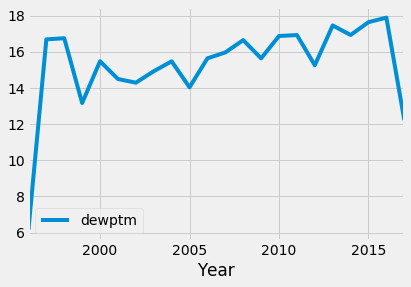

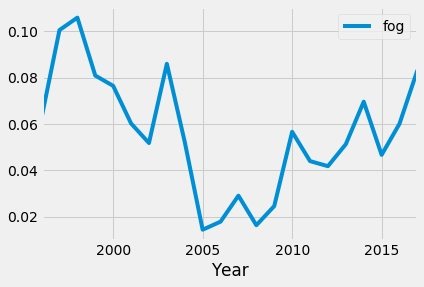

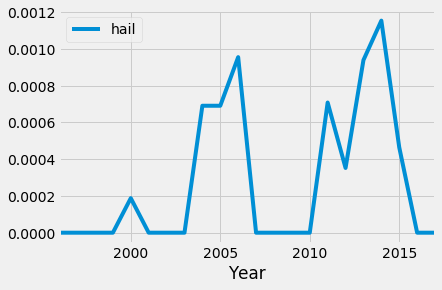

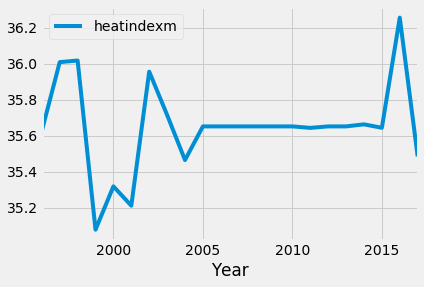

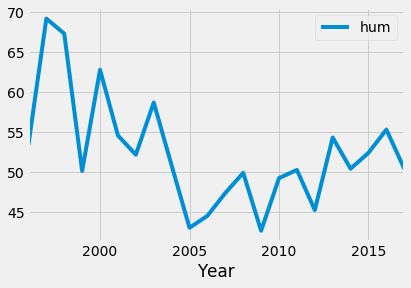

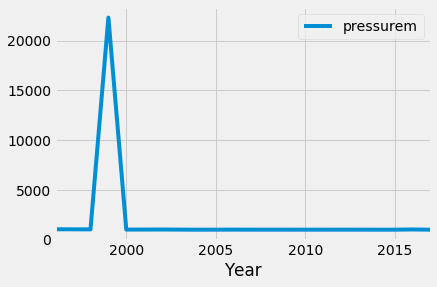

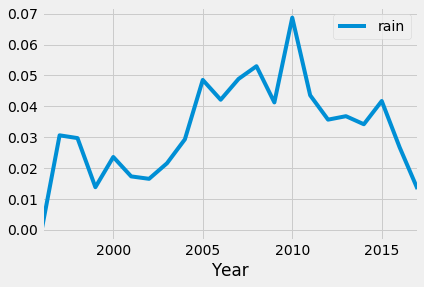

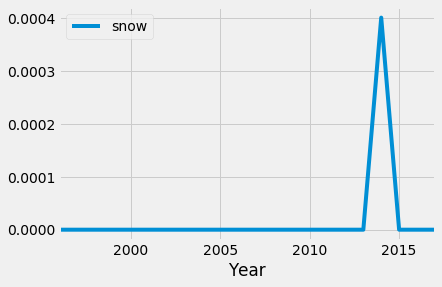

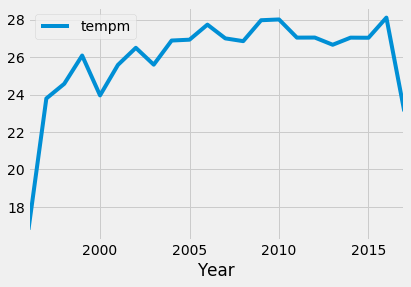

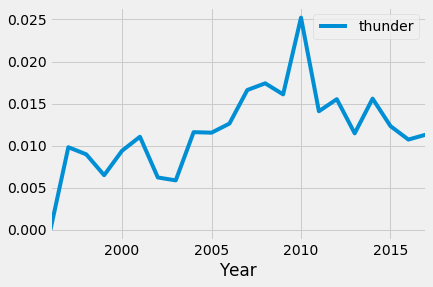

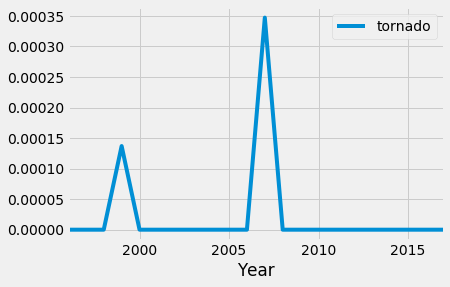

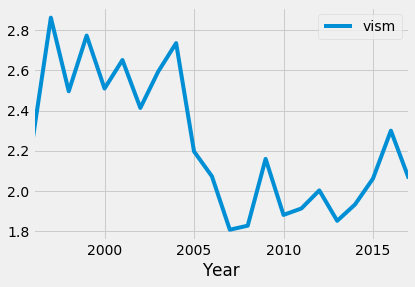

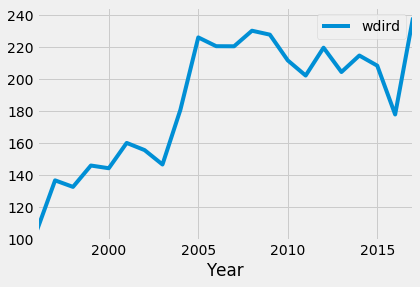

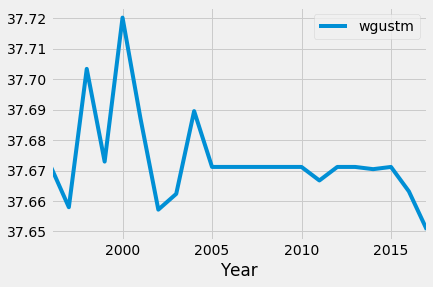

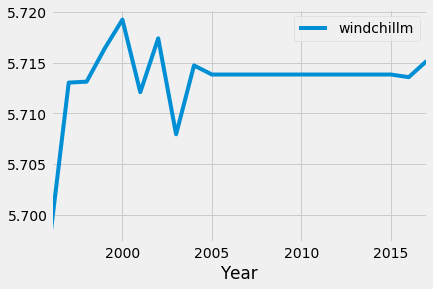

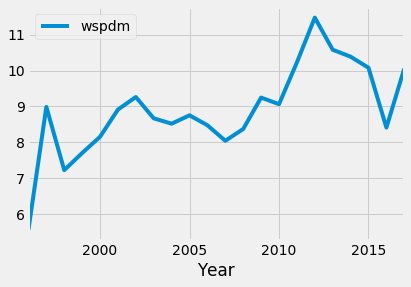

In [13]:
for i in df.select_dtypes(include=["number"]):
    df.resample('Y').mean().plot(y=i)
    plt.xlabel('Year')
    plt.show()

# Make pie charts for different weather conditions in a month.

In [14]:
df=pd.read_csv("weather.csv")
df.columns = [c.replace(' _', '') for c in df.columns]
df = df.loc[:,'datetime_utc':'conds']

In [15]:
df['datetime_utc'] = pd.to_datetime(df['datetime_utc'])
df = df.set_index('datetime_utc')

In [16]:
d = dict()
for index,row in df.iterrows():
    yyyy = index.year
    mm = index.month
    cond = row['conds']
    if yyyy == 2002 and mm == 3:
        if cond not in d:
            d[cond]=0
        d[cond]+=1

In [17]:
d

{'Haze': 454,
 'Smoke': 187,
 'Rain': 1,
 'Light Drizzle': 1,
 'Scattered Clouds': 15,
 'Partly Cloudy': 22,
 'Shallow Fog': 6,
 'Fog': 8,
 'Clear': 37,
 'Widespread Dust': 2}

([<matplotlib.patches.Wedge at 0x152ad790>,
 [Text(-0.4029197834365045, 1.0235505107787697, 'Haze'),
  Text(-0.021214198911216058, -1.099795416322761, 'Smoke'),
  Text(0.7786503329987261, -0.776983692828217, 'Rain'),
  Text(0.7852818532608918, -0.7702807351473484, 'Light Drizzle'),
  Text(0.8362167883508674, -0.7146617961526701, 'Scattered Clouds'),
  Text(0.9385808726221989, -0.5736426985046981, 'Partly Cloudy'),
  Text(1.0005060950952596, -0.4571515653229631, 'Shallow Fog'),
  Text(1.0261196053850494, -0.3963313707548658, 'Fog'),
  Text(1.0830603275377249, -0.19230269606502273, 'Clear'),
  Text(1.099959586648566, -0.00942909008949261, 'Widespread Dust')])

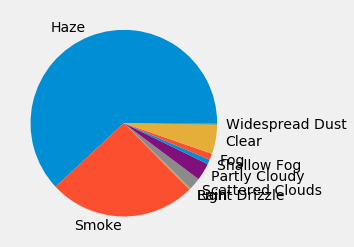

In [18]:
plt.pie(list(d.values()),labels=d.keys())